In [1]:
!pip install transformers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import transformers
from sklearn.preprocessing import LabelEncoder

2022-11-17 09:16:59.036034: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-11-17 09:16:59.036137: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data exploration

In [3]:
df = pd.read_csv('../input/dataset/News_Dataset.csv')

In [4]:
df.head()

,headline,category,short_description,date
0,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",2022-09-20
1,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,2022-09-19
2,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,2022-09-19
3,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",2022-09-18
4,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...",2022-09-18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80212 entries, 0 to 80211
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   headline           80211 non-null  object
 1   category           80212 non-null  object
 2   short_description  73986 non-null  object
 3   date               80212 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


In [6]:
df.isna().sum()

headline                1
category                0
short_description    6226
date                    0
dtype: int64

In [7]:
# Drop all Na rows
df = df[df['headline'].notna()]
df = df[df['short_description'].notna()]

In [8]:
def plot_category_bar(dataframe: pd.DataFrame):
    print(dataframe['category'].value_counts())
    category_data = dataframe['category'].value_counts().sort_index().to_dict()
    category = list(category_data.keys())
    category_stat = list(category_data.values())
    fig = plt.figure(figsize = (10, 5)) 

    plt.bar(category, category_stat, width = 0.4)

    plt.xlabel("Categories")
    plt.ylabel("No. of News")
    plt.title("The number of news in different Categories")
    plt.show()

POLITICS         32099
WELLNESS         17769
ENTERTAINMENT    14719
TRAVEL            9399
Name: category, dtype: int64


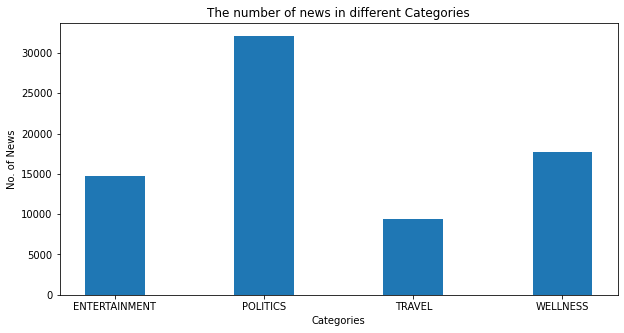

In [9]:
plot_category_bar(df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


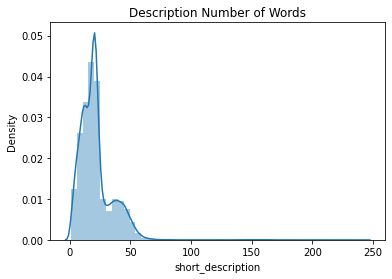

In [10]:
sns.distplot(df['short_description'].apply(lambda x: len(str(x).split())))
plt.title('Description Number of Words')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


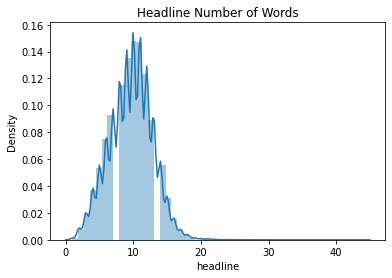

In [11]:
sns.distplot(df['headline'].apply(lambda x: len(str(x).split())))
plt.title('Headline Number of Words')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


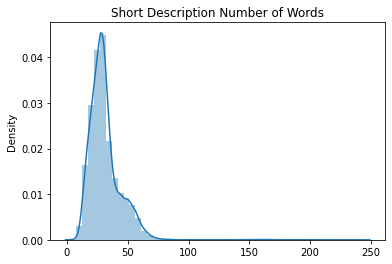

In [12]:
sns.distplot(df['short_description'].apply(lambda x: len(str(x).split())) + df['headline'].apply(lambda x: len(str(x).split())))
plt.title('Short Description Number of Words')
plt.show()

In [13]:
np.random.seed(42)
category_data = df['category'].value_counts().to_dict()
len_cat_politics = category_data['POLITICS']
del category_data['POLITICS']

category = list(category_data.keys())
category_stat = list(category_data.values())
remove_n = len_cat_politics - int(sum(category_stat)/len(category))
print("remove_n =", remove_n)

drop_indices = np.random.choice(df[df['category'] == 'POLITICS'].index, remove_n, replace=False)
df = df.drop(drop_indices)

remove_n = 18137


WELLNESS         17769
ENTERTAINMENT    14719
POLITICS         13962
TRAVEL            9399
Name: category, dtype: int64


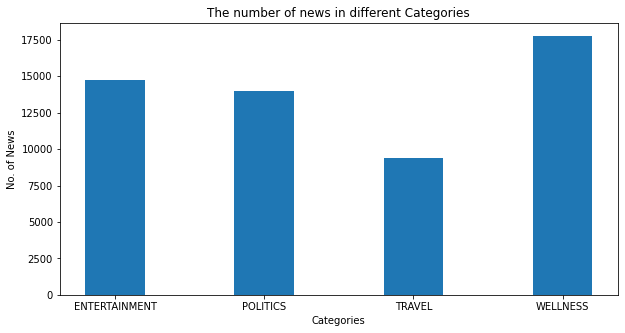

In [14]:
plot_category_bar(df)

In [15]:
# Data normilize
df['short_description'] = df['short_description'].apply(lambda descr: str(descr).lower())
df['headline'] = df['headline'].apply(lambda headline: str(headline).lower())

In [16]:
#class label encode
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])

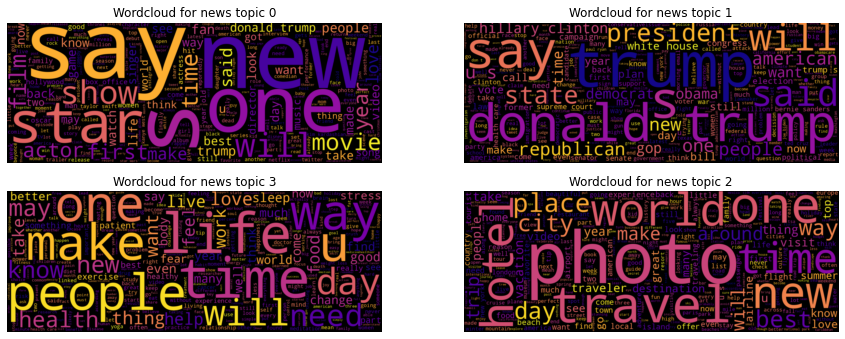

In [17]:
from wordcloud import WordCloud, STOPWORDS

# create new dataframe of category and length of each news articles in that categories
ndf = df.copy()
ndf['title_and_desc'] = ndf['headline'] + ndf['short_description']
categories = ndf['category'].unique()

# list of news articles of each categories list
articles_list = []

for i in categories:
    cat_ndf = ndf[ndf['category'] == i]
    cat_array = cat_ndf['title_and_desc'].values  # array of news articles text in each category
    articles_list.append(cat_array)
    
# create a wordcloud instance
wc1 = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=True,
               stopwords=STOPWORDS)

# plot the figure of 10 wordcloud from out dataset
plt.figure(figsize=(15,15))

for idx, j in enumerate(categories):
    plt.subplot(5,2,idx+1)
    cloud = wc1.generate(' '.join(articles_list[idx]))
    plt.imshow(cloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for news topic {j}")
    plt.axis('off')

In [18]:
df = df.reindex(columns = [col for col in df.columns if col != 'category'] + ['category'])

# Data splitting

In [19]:
df = df.drop('date', axis=1)

In [20]:
classes = list(encoder.classes_)

In [21]:
from sklearn.model_selection import train_test_split

data_POLITICS = df[df['category'] == classes.index('POLITICS')]
data_WELLNESS = df[df['category'] ==  classes.index('WELLNESS')]
data_ENTERTAINMENT = df[df['category'] == classes.index('ENTERTAINMENT')]
data_TRAVEL = df[df['category'] == classes.index('TRAVEL')]

X_politics_train, X_politics_test, y_politics_train, y_politics_test = train_test_split(data_POLITICS.iloc[:,:-1], data_POLITICS.iloc[:,-1], test_size=0.33, random_state=42)
X_xellness_train, X_xellness_test, y_xellness_train, y_xellness_test = train_test_split(data_WELLNESS.iloc[:,:-1], data_WELLNESS.iloc[:,-1], test_size=0.33, random_state=42)
X_entertainment_train, X_entertainment_test, y_entertainment_train, y_entertainment_test = train_test_split(data_ENTERTAINMENT.iloc[:,:-1], data_ENTERTAINMENT.iloc[:,-1], test_size=0.33, random_state=42)
X_travel_train, X_travel_test, y_travel_train, y_travel_test = train_test_split(data_TRAVEL.iloc[:,:-1], data_TRAVEL.iloc[:,-1], test_size=0.33, random_state=42)

X_train = pd.concat([X_politics_train, X_xellness_train, X_entertainment_train, X_travel_train])
y_train = pd.concat([y_politics_train, y_xellness_train, y_entertainment_train, y_travel_train])
X_test = pd.concat([X_politics_test, X_xellness_test, X_entertainment_test, X_travel_test])
y_test = pd.concat([y_politics_test, y_xellness_test, y_entertainment_test, y_travel_test])

# Model Design

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [23]:
model.fit(X_train['headline'], y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [24]:
y_pred = model.predict(X_test['headline'])

               precision    recall  f1-score   support

ENTERTAINMENT     0.8754    0.8753    0.8753      4858
     POLITICS     0.8819    0.8878    0.8848      4608
       TRAVEL     0.9510    0.7076    0.8115      3102
     WELLNESS     0.8291    0.9371    0.8798      5864

     accuracy                         0.8698     18432
    macro avg     0.8844    0.8519    0.8628     18432
 weighted avg     0.8750    0.8698    0.8684     18432



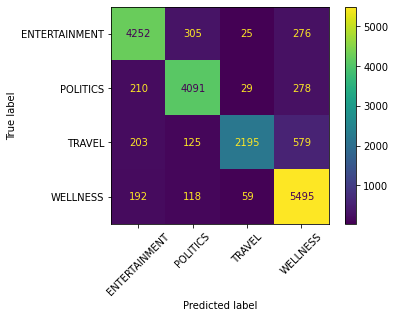

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45)

print(classification_report(y_test,y_pred,target_names=classes,digits=4))

# Model Design 2 (BERT fine tune)

In [26]:
# TPU Config
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470


2022-11-17 09:17:38.155284: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-17 09:17:38.158004: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-11-17 09:17:38.158037: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-17 09:17:38.158058: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5ff1093d8801): /proc/driver/nvidia/version does not exist
2022-11-17 09:17:38.160909: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

REPLICAS:  8


In [27]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts, 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

In [28]:
#bert large uncased pretrained tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [29]:
Xtrain_encoded = regular_encode((X_train['headline'] + X_train['short_description']).astype('str'), tokenizer, maxlen=80)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=4,dtype = 'int32')
Xtest_encoded = regular_encode((X_test['headline'] + X_test['short_description']).astype('str'), tokenizer, maxlen=80)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=4,dtype = 'int32')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [30]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    #adding dropout layer
    x = tf.keras.layers.Dropout(0.3)(cls_token)
    #using a dense layer of 40 neurons as the number of categories is 4. 
    out = tf.keras.layers.Dense(4, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_word_ids, outputs=out)
    #using categorical crossentropy as the loss as it is a multi-class classification problem
    model.compile(tf.keras.optimizers.Adam(lr=5e-7), loss=loss, metrics=['accuracy'])
    return model

with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('bert-base-uncased')
    model = build_model(transformer_layer, max_len=80)
model.summary()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 80)]              0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3076      
Total params: 109,485,316
Trainable params: 109,485,316
Non-trainable params: 0
_________________________________________________________________


In [31]:
Xtrain_encoded.shape

(37417, 80)

In [32]:
BATCH_SIZE = 64*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded, ytrain_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded)
    .batch(BATCH_SIZE)
)

In [33]:
n_steps = Xtrain_encoded.shape[0] 
train_history = model.fit(
    train_dataset,
    steps_per_epoch=549,
    epochs=10
)

Epoch 1/10
549/549 [==============================] - 146s 148ms/step - loss: 1.5478 - accuracy: 0.2568
Epoch 2/10
549/549 [==============================] - 81s 148ms/step - loss: 1.0534 - accuracy: 0.5672
Epoch 3/10
549/549 [==============================] - 82s 149ms/step - loss: 0.5598 - accuracy: 0.8027
Epoch 4/10
549/549 [==============================] - 82s 149ms/step - loss: 0.4095 - accuracy: 0.8633
Epoch 5/10
549/549 [==============================] - 82s 149ms/step - loss: 0.3225 - accuracy: 0.8951
Epoch 6/10
549/549 [==============================] - 82s 149ms/step - loss: 0.2914 - accuracy: 0.9054
Epoch 7/10
549/549 [==============================] - 82s 149ms/step - loss: 0.2545 - accuracy: 0.9179
Epoch 8/10
549/549 [==============================] - 81s 148ms/step - loss: 0.2453 - accuracy: 0.9212
Epoch 9/10
549/549 [==============================] - 82s 149ms/step - loss: 0.2156 - accuracy: 0.9304
Epoch 10/10
549/549 [==============================] - 82s 149ms/step - 

In [34]:
#making predictions
y_pred = model.predict(test_dataset,verbose = 1)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

36/36 [==============================] - 10s 212ms/step


array([1, 1, 1, ..., 2, 2, 2])

               precision    recall  f1-score   support

ENTERTAINMENT     0.9295    0.9391    0.9343      4858
     POLITICS     0.9456    0.9245    0.9349      4608
       TRAVEL     0.9150    0.9404    0.9275      3102
     WELLNESS     0.9530    0.9476    0.9503      5864

     accuracy                         0.9384     18432
    macro avg     0.9358    0.9379    0.9368     18432
 weighted avg     0.9386    0.9384    0.9384     18432



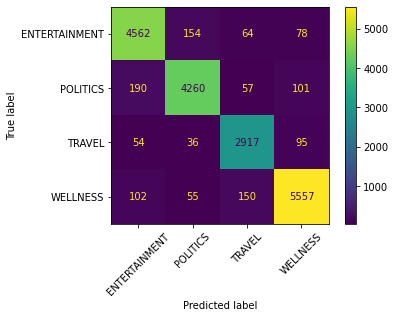

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45)

print(classification_report(y_test,y_pred,target_names=classes,digits=4))

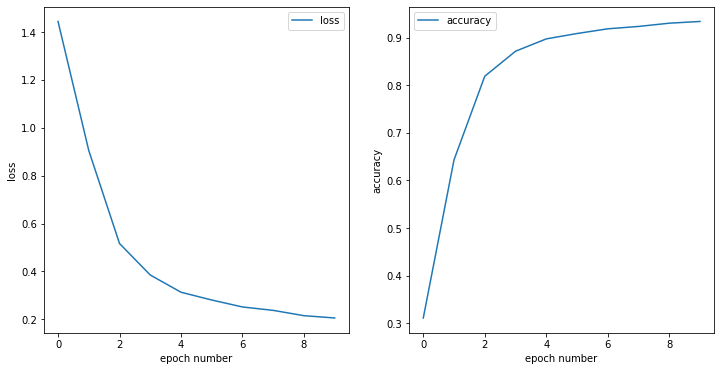

In [39]:
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    
    history_df.loc[0:, ['loss']].plot(ax=ax[0])
    ax[0].set(xlabel = 'epoch number', ylabel = 'loss')

    history_df.loc[0:, ['accuracy']].plot(ax=ax[1])
    ax[1].set(xlabel = 'epoch number', ylabel = 'accuracy')

plot_loss_and_accuracy(train_history.history)

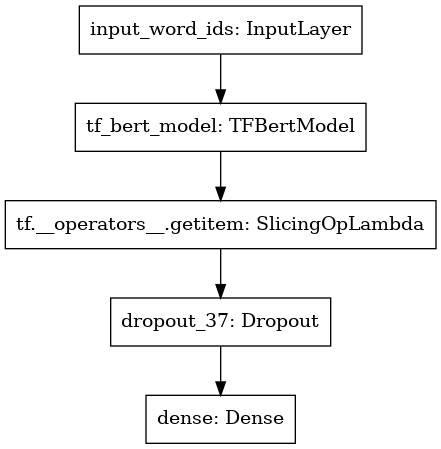

In [42]:
# Model structure
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [46]:
model.save_weights('bert_New_Classifier_weights.h5')